In [1]:
from expariment_utils import *
from model import ViT
from configs import mnist_config
from torchvision.datasets import MNIST
from torchvision import transforms

In [2]:
config = mnist_config()
model = load_model(ViT, 'mnist.pth', config)

In [3]:
dataset = MNIST(root='../datasets', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]))

data = dataset.data
label = dataset.targets

In [4]:
model_summary(model)

                                                     Kernel Shape  \
Layer                                                               
0_to_patch                                          [1, 16, 4, 4]   
1_flatten_patches                                               -   
2_linear_projection                                      [16, 64]   
3_transformer_encoder.blocks.0.LayerNorm_layer_...           [64]   
4_transformer_encoder.blocks.0.msa.Linear_fc_q           [64, 64]   
5_transformer_encoder.blocks.0.msa.Linear_fc_k           [64, 64]   
6_transformer_encoder.blocks.0.msa.Linear_fc_v           [64, 64]   
7_transformer_encoder.blocks.0.msa.Dropout_dropout              -   
8_transformer_encoder.blocks.0.msa.Linear_fc_o           [64, 64]   
9_transformer_encoder.blocks.0.Dropout_dropout                  -   
10_transformer_encoder.blocks.0.LayerNorm_layer...           [64]   
11_transformer_encoder.blocks.0.mlp.Linear_fc1         [64, 1024]   
12_transformer_encoder.blocks.0.ml

In [5]:
import random

plot_attention_map(data[random.randint(0, 10000)], model, 28, 'cuda')

(28, 28)
torch.Size([1, 28, 28])


In [6]:
data[0].shape

torch.Size([28, 28])

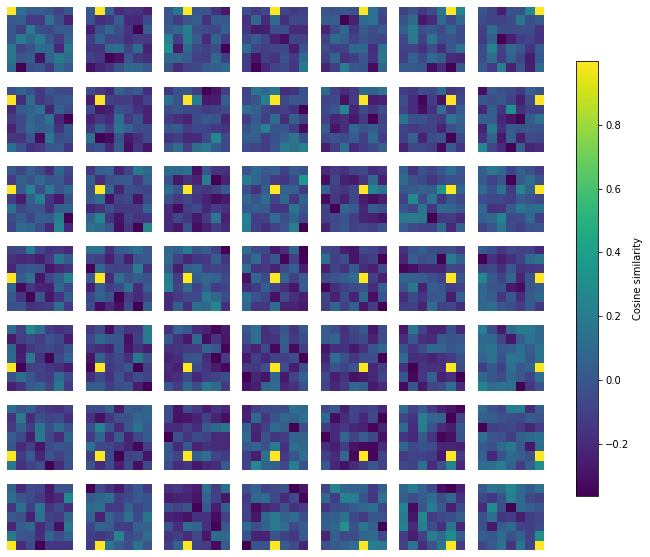

In [7]:
pos_embeddings = model.pos_embedding.squeeze()[1:, :]
plot_pos_emb_similarity(pos_embeddings)

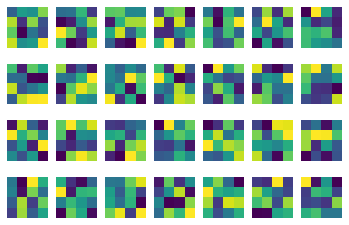

In [8]:
embed_filters = model.linear_projection.weight
plot_rgb_filters(embed_filters)